In [73]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [74]:
stardf = pd.read_csv("..//TG_stars.csv")
stardf.head (7)

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass
0,9.10,3.54,1.39,0.482,16.845016,3
1,9.27,21.90,3.10,0.999,20.972221,5
2,6.61,2.81,0.63,-0.019,13.853532,1
3,8.06,7.75,0.97,0.370,17.506509,3
4,8.55,2.87,1.11,0.902,15.839409,4
5,12.31,18.80,4.99,1.336,23.680789,6
6,9.64,17.74,1.30,0.740,20.884768,4


In [75]:
stars_df_features = stardf.copy()

stars_df_features['Amag_SQ'] = stars_df_features['Amag']**2
stars_df_features['Vmag_SQ'] = stars_df_features['Vmag']**2
stars_df_features['B-V_SQ'] = stars_df_features['B-V']**2
stars_df_features['Plx_SQ'] = stars_df_features['Plx']**2
#stars_df_features['Sum_AV'] = stars_df_features['Amag'] + stars_df_features['Vmag']
#stars_df_features['Sub_AV'] = stars_df_features['Amag'] + stars_df_features['Vmag']

stars_df_features.head()

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,Amag_SQ,Vmag_SQ,B-V_SQ,Plx_SQ
0,9.10,3.54,1.39,0.482,16.845016,3,283.754574,82.8100,0.232324,12.5316
1,9.27,21.90,3.10,0.999,20.972221,5,439.834036,85.9329,0.998001,479.6100
2,6.61,2.81,0.63,-0.019,13.853532,1,191.920338,43.6921,0.000361,7.8961
3,8.06,7.75,0.97,0.370,17.506509,3,306.477840,64.9636,0.136900,60.0625
4,8.55,2.87,1.11,0.902,15.839409,4,250.886893,73.1025,0.813604,8.2369


In [76]:
stars_df_features.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9677 entries, 0 to 9676
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         9677 non-null   float64
 1   Plx          9677 non-null   float64
 2   e_Plx        9677 non-null   float64
 3   B-V          9677 non-null   float64
 4   Amag         9677 non-null   float64
 5   TargetClass  9677 non-null   int64  
 6   Amag_SQ      9677 non-null   float64
 7   Vmag_SQ      9677 non-null   float64
 8   B-V_SQ       9677 non-null   float64
 9   Plx_SQ       9677 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 756.1 KB


In [77]:
df_zero = stars_df_features[stars_df_features.TargetClass == 0]
df_one = stars_df_features[stars_df_features.TargetClass == 1]
df_two = stars_df_features[stars_df_features.TargetClass == 2]
df_three = stars_df_features[stars_df_features.TargetClass == 3]
df_four = stars_df_features[stars_df_features.TargetClass == 4]
df_five = stars_df_features[stars_df_features.TargetClass == 5]
df_six = stars_df_features[stars_df_features.TargetClass == 6]
df_seven = stars_df_features[stars_df_features.TargetClass == 7]

In [78]:
num_of_zero=df_zero.shape[0]
num_of_one = df_one.shape[0]
num_of_two = df_two.shape[0]
num_of_three = df_three.shape[0]
num_of_four = df_four.shape[0]
num_of_five = df_five.shape[0]
num_of_six = df_six.shape[0]
num_of_seven = df_seven.shape[0]
print("0:",num_of_zero)
print("1:",num_of_one)
print("2 :",num_of_two)
print("3 :",num_of_three)
print("4 :",num_of_four)
print("5 :",num_of_five)
print("6 :",num_of_six)
print("6:", num_of_seven)

0: 10
1: 559
2 : 1285
3 : 2457
4 : 2178
5 : 2733
6 : 433
6: 22


In [79]:
from sklearn.utils import resample

In [80]:
# group 3 from rfc_model-copy2 had the greatest f1 score? If I increase all units to targetclass 3 will his hold for all?

In [81]:
df_zero_upsampled = resample(df_zero, 
                                 replace=True,    
                                 n_samples=num_of_three,    
                                 random_state=1) 
df_one_upsampled = resample(df_one, 
                                 replace=True,    
                                 n_samples=num_of_three,    
                                 random_state=1) 
df_two_upsampled = resample(df_three, 
                                 replace=True,    
                                 n_samples=num_of_three,     
                                 random_state=1) 
df_four_upsampled = resample(df_four, 
                                 replace=True,    
                                 n_samples=num_of_three,     
                                 random_state=1) 
df_five_upsampled = resample(df_five, 
                                 replace=True,    
                                 n_samples=num_of_three,     
                                 random_state=1) 
df_six_upsampled = resample(df_six, 
                                 replace=True,    
                                 n_samples=num_of_three,     
                                 random_state=1) 
df_seven_upsampled = resample(df_seven, 
                                 replace=True,    
                                 n_samples=num_of_three,     
                                 random_state=1) 

In [82]:
stardf_resampled1 = pd.concat([df_zero_upsampled, df_one_upsampled])
stardf_resampled2 = pd.concat([stardf_resampled1, df_two_upsampled])
stardf_resampled3 = pd.concat([stardf_resampled2, df_four_upsampled])
stardf_resampled4 = pd.concat([stardf_resampled3, df_five_upsampled])
stardf_resampled5 = pd.concat([stardf_resampled4, df_six_upsampled])
stardf_resampled = pd.concat([stardf_resampled5, df_seven_upsampled])

In [83]:
stardf_resampled

,Vmag,Plx,e_Plx,B-V,Amag,TargetClass,Amag_SQ,Vmag_SQ,B-V_SQ,Plx_SQ
6623,8.72,0.80,1.58,0.390,13.235450,0,175.177135,76.0384,0.152100,0.6400
8907,10.01,4.08,1.40,-0.280,18.063301,0,326.282836,100.2001,0.078400,16.6464
9205,8.94,-0.32,1.13,-0.054,11.465750,0,131.463421,79.9236,0.002916,0.1024
6623,8.72,0.80,1.58,0.390,13.235450,0,175.177135,76.0384,0.152100,0.6400
165,9.05,1.27,1.11,0.976,14.569019,0,212.256303,81.9025,0.952576,1.6129
...,...,...,...,...,...,...,...,...,...,...
4142,9.60,-0.17,1.61,2.700,10.752245,7,115.610764,92.1600,7.290000,0.0289
93,7.04,1.27,0.70,2.835,12.559019,7,157.728948,49.5616,8.037225,1.6129
4930,11.16,5.46,6.54,0.264,19.845963,7,393.862256,124.5456,0.069696,29.8116
3307,10.11,-1.09,1.52,0.401,15.297132,7,234.002262,102.2121,0.160801,1.1881


In [84]:
X = stardf_resampled.drop('TargetClass', axis=1, inplace=False)
Y = stardf_resampled['TargetClass']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=21, stratify=Y)

In [85]:
#n_neigh = 12
#K_best = 0
#Score_best = 0

#for i in range(1,n_neigh):
   # KNN = KNeighborsClassifier(n_neighbors=i)
    #KNN.fit(X_train,Y_train)
    #Y_pred = KNN.predict(X_test)
    #if KNN.score(X_test,Y_test) > Score_best:
      #  Score_best = KNN.score(X_test,Y_test)
       # K_best = i
#print("neighbors is {} with a test accuracy of {}%""".format(K_best, (Score_best*100)))
#neighbors is 10 with a test accuracy of 52.01446280991735%

In [86]:
Y_test.value_counts()

1    492
5    492
0    492
3    491
6    491
4    491
7    491
Name: TargetClass, dtype: int64

In [87]:
Y_test.count ()

3440

In [88]:
import warnings
warnings.filterwarnings("ignore")

In [89]:
Y_train.value_counts()

7    1966
6    1966
4    1966
3    1966
0    1965
1    1965
5    1965
Name: TargetClass, dtype: int64

In [90]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score

In [91]:
#model = KNeighborsClassifier(n_neighbors=5)
#model.fit(X_train,Y_train)
#Y_pred = KNN.predict(X_test)
#print("Precision Score : ",precision_score(Y_test, Y_pred, 
                                          # pos_label='positive',
                                           #average='micro'))
#print("Recall Score : ",recall_score(Y_test, Y_pred, 
                                           #pos_label='positive',
                                           #average='micro'))
        
#Precision Score :  0.5175619834710744
#Recall Score :  0.5175619834710744     

In [92]:
#classifier = LogisticRegression()
#classifier.fit(X_train, Y_train)

#print(f"LR Training Data: {classifier.score(X_train, Y_train)}")
#print(f"LR Testing Data: {classifier.score(X_test, Y_test)}")
#LR Training Data: 0.5083322568143651
#LR Testing Data: 0.5051652892561983

In [93]:
rfc = RandomForestClassifier()

In [94]:
# by increasing my test size I am able to get a better result, will this be the same if i use up/ downsampling?

In [95]:
Y_train

7432    7
7124    6
4327    4
5723    3
1279    6
       ..
832     6
9395    1
8426    0
8242    3
1364    0
Name: TargetClass, Length: 13759, dtype: int64

In [96]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

#y_0 = np.ones(8)     
#y_1 = np.ones(477) + 1 
#y_2 = np.ones(1028) + 2 
#y_3 = np.ones(1966) + 3 
#y_4 = np.ones(1742) + 4 
#y_5 = np.ones(2186) + 5 
#y_6 = np.ones(346) + 6 
#y_7 = np.ones(18) + 7
#train_labels= np.concatenate([y_0,y_1, y_2,y_3,y_4,y_5,y_6,y_7])
#len(y)

#classes=[0,1,2,3,4,5,6,7]
#len(y)

In [97]:
#class_weights = compute_class_weight(class_weight = "balanced", classes= np.unique(train_labels), y= train_labels)
#class_weights

In [98]:
#wg={0:121.421875,1:2.03642558,2:0.94491732,3:0.49408698,4:0.55762055,5:0.44436185,6:2.8074422,7:53.96527778}

In [99]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf =RandomForestClassifier(n_estimators=200, max_features="log2", max_depth=10).fit(X_train_scaled, Y_train)

y_pred=clf.predict(X_test_scaled)

print(f'RFC Training Data : {clf.score(X_train_scaled,Y_train)}')
print(f'RFC Testing Data: {clf.score(X_test_scaled,Y_test)}')

RFC Training Data : 0.9324805581801003
RFC Testing Data: 0.9116279069767442


In [100]:
# >:) got ya b*tch 

In [101]:
#RFC Training Data : 0.8759850148559618
#RFC Testing Data: 0.7758264462809917

#Achieved with a sample size of 0.2 
#n_estimators=200, max_features="log2", max_depth=10

In [102]:
classifier = clf
classifier
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=200)

In [122]:
predictions = classifier.predict(X_test)
print(f"First 30 predictions:   {predictions[:30]}")
print(f"First 30 actual labels: {Y_test[:30].tolist()}")

First 30 predictions:   [1 3 3 1 6 4 5 4 6 4 6 6 7 5 0 7 6 4 6 1 4 0 0 5 4 3 0 6 7 7]
First 30 actual labels: [4, 6, 7, 3, 6, 3, 6, 1, 3, 3, 4, 5, 1, 0, 5, 4, 6, 4, 5, 0, 6, 5, 7, 7, 4, 7, 1, 7, 5, 5]


In [104]:
y_true = Y_test
y_pred = classifier.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[492,   0,   0,   0,   0,   0,   0],
       [  2, 477,   5,   6,   2,   0,   0],
       [  0,  12, 453,  26,   0,   0,   0],
       [  0,   3,  45, 389,  52,   2,   0],
       [  0,   0,   0,  54, 378,  60,   0],
       [  0,   0,   0,   0,  26, 465,   0],
       [  0,   0,   0,   0,   0,   0, 491]], dtype=int64)

In [105]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       492
           1       0.97      0.97      0.97       492
           3       0.90      0.92      0.91       491
           4       0.82      0.79      0.81       491
           5       0.83      0.77      0.80       492
           6       0.88      0.95      0.91       491
           7       1.00      1.00      1.00       491

    accuracy                           0.91      3440
   macro avg       0.91      0.91      0.91      3440
weighted avg       0.91      0.91      0.91      3440



In [119]:
#it works? Maybe, I hope so. I think it's good. 

In [107]:
feature_importances = clf.feature_importances_

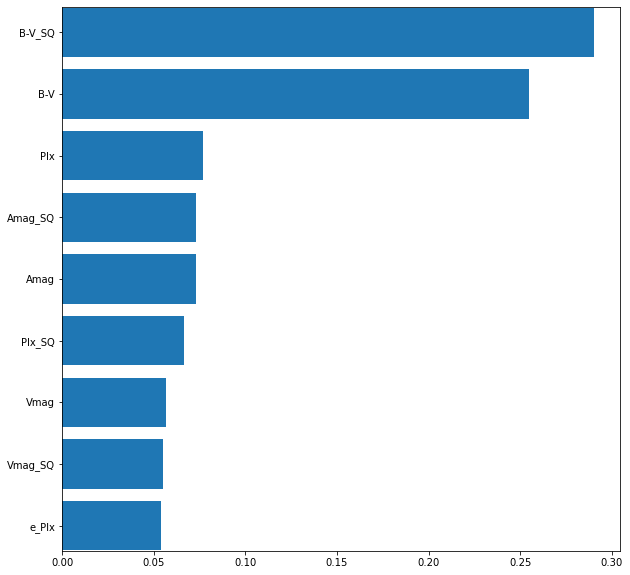

In [108]:
features = sorted(zip(X.columns, clf.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols, width=width)

plt.show()

In [109]:
#upsampling created a larger feature importance on plx, unlike the previous model which puts more focus on AMAG. 
#this is potentially an issue, plx doesn't really help loads with star classification. AMAG should be second after B-V. 
#The good news is that your model will learn considerably more about your minority class and won’t just predict the majority
#class for a given observation. The bad news is that it’s also possibly going to overfit to the characteristics of those 
#observations you’ve just duplicated multiple times.

In [110]:
#RFC Training Data : 0.8699134478749515
#RFC Testing Data: 0.7742768595041323 #n_estimators=200, max_features="log2", max_depth=10
#RFC Training Data : 0.9711923524092495
#RFC Testing Data: 0.7608471074380165(n_estimators=200, max_features="log2", max_depth=15)


#increase sample size= 0.3
#RFC Training Data : 0.880702790491658
#RFC Testing Data: 0.7796143250688705 #n_estimators=200, max_features="log2", max_depth=10

In [121]:
#from sklearn.feature_selection import SelectFromModel
#sel = SelectFromModel(clf)
#sel.fit(X_train_scaled, Y_train)

In [112]:
#X_selected_train, X_selected_test, Y_train, Y_test = train_test_split(sel.transform(X), Y)
#scaler = StandardScaler().fit(X_selected_train)
#X_selected_train_scaled = scaler.transform(X_selected_train)
#X_selected_test_scaled = scaler.transform(X_selected_test)

In [120]:
#clf = LogisticRegression()
#clf.fit(X_selected_train_scaled, Y_train)
#print(f'Training Score: {clf.score(X_selected_train_scaled, Y_train)}')
#print(f'Testing Score: {clf.score(X_selected_test_scaled, Y_test)}')

In [114]:
# does not improve score stick with RFC
#test model3- yes this is good- it's not regression so I know it's using distance. 

In [115]:
#non linear models need more data to pull from this is why increasing the test size works so well, but how to I go about
#upsamping without creating bias? Nothing changes when I use the larger data set so that isn't the issue, it's the distribution. 
#my only concern now is that I've created bias, I need to figure out how to sort class weights because I'm introducing too much 
#extra data into my model. It's no longer realistic. 

In [116]:
#from sklearn.datasets import make_classification
#from sklearn.ensemble import RandomForestClassifier
# Build a classification task using 3 informative features
#X, Y = make_classification(n_samples=1936,
                         #  n_features=10,
                         #  n_informative=3,
                         #  n_redundant=0,
                         #  n_repeated=0,
                         #  n_classes=2,
                          # random_state=0,
                          # shuffle=False)


#rfc = RandomForestClassifier() 

#param_grid = { 
   # 'n_estimators': [100, 200, 500],
   # 'max_features': ['auto', 'sqrt', 'log2'],
   # 'max_depth': [1,3,5,7,10],    
#}

#CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X, Y)
#print (CV_rfc.best_params_)

In [117]:
#from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import train_test_split

In [118]:

#RFC Training Data : 0.8699134478749515
#RFC Testing Data: 0.7742768595041323 #n_estimators=200, max_features="log2", max_depth=10
#RFC Training Data : 0.9711923524092495
#RFC Testing Data: 0.7608471074380165(n_estimators=200, max_features="log2", max_depth=15)
#RFC Training Data : 0.8697842655987599
#RFC Testing Data: 0.7706611570247934 (n_estimators=200, max_features="auto", max_depth=10)